*** Implementation des K-means en python ***

In [2]:
# import des bibliotheques 

from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# fonction permettant a l'utilisateur d'initialiser ses points

def saisie_points():
    print("Entrez vos points sous la forme x,y (par exemple : 1.5,2.5).")
    print("Tapez 'fin' quand vous avez terminé.")
    points = []
    while True:
        saisie = input("Point (x,y) : ")
        if saisie.lower() == 'fin':
            break
        try:
            x, y = map(float, saisie.split(','))
            points.append([x, y])
        except ValueError:
            print("Format incorrect. Entrez le point sous la forme x,y.")
    return np.array(points)


In [4]:
# fonction permettant a l'utilisateur d'entrer le nombre de cluster qu'il souhaite pour sa classification

def saisie_nombre_clusters():
    while True:
        try:
            k = int(input("Nombre de clusters (k) : "))
            if k > 0:
                return k
            else:
                print("Le nombre de clusters doit être un entier positif.")
        except ValueError:
            print("Entrez un nombre entier valide.")


            

*** Fonction Kmeans() de la bibliotheque sklearn ***

In [5]:
# fonction de classification avec sklearn 

def classification_kmeans(points, k):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(points)
    return kmeans.labels_, kmeans.cluster_centers_

*** Fonction de classification sans Bibliotheque ***

In [7]:
# fonction d'initialisation aleatoire des centroide a partir des points entrer par l'utilisateur
def initialiser_centroides(points, k):
    indices = np.random.choice(points.shape[0], k, replace=False)
    return points[indices]

# fonction permettant d'assigner des clusters
def assigner_clusters(points, centroids):
    labels = np.zeros(points.shape[0], dtype=int) # tableau contenant les distances min
    for i, point in enumerate(points):
        distances = np.linalg.norm(point - centroids, axis=1) # calcul de la distance [point-centoide]
        labels[i] = np.argmin(distances)
    return labels

# fonction permettant de recalculer les centroides en prenant la moyenne des points dans chaque cluster
def recalculer_centroides(points, labels, k):
    centroids = np.zeros((k, points.shape[1]))
    for i in range(k):
        cluster_points = points[labels == i]
        if len(cluster_points) > 0:
            centroids[i] = cluster_points.mean(axis=0)
    return centroids


# fonction de classification kmeans sans bibliotheques
def classification_kmeans_fromScratch(points, k, max_iters=100, tol=1e-4):
    # Initialisation des centroïdes
    centroids = initialiser_centroides(points, k)
    for _ in range(max_iters):
        labels = assigner_clusters(points, centroids)# Assignation des points aux clusters les plus proches
        new_centroids = recalculer_centroides(points, labels, k)# Recalcule des centroïdes
        if np.all(np.abs(new_centroids - centroids) < tol): # ici on check si les centres ne varie plus
            break
        centroids = new_centroids
    return labels, centroids # on retourne les clusters et leurs centres


*** Partie pour la visualisation des resultats ***

In [11]:
# Étape 4 : Affichage des résultats
def afficher_resultats(points, labels, centroids):
    plt.scatter(points[:, 0], points[:, 1], c=labels, cmap='viridis', marker='o', s=100, alpha=0.7)
    for i, (x, y) in enumerate(points):
        plt.text(x + 0.1, y + 0.1 , f"({x}, {y})", fontsize=9, ha='center')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, label='Centroids')
    plt.title("Classification K-Means")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.show()



*** Programme principale ***

Entrez vos points sous la forme x,y (par exemple : 1.5,2.5).
Tapez 'fin' quand vous avez terminé.


/home/djampa/.local/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


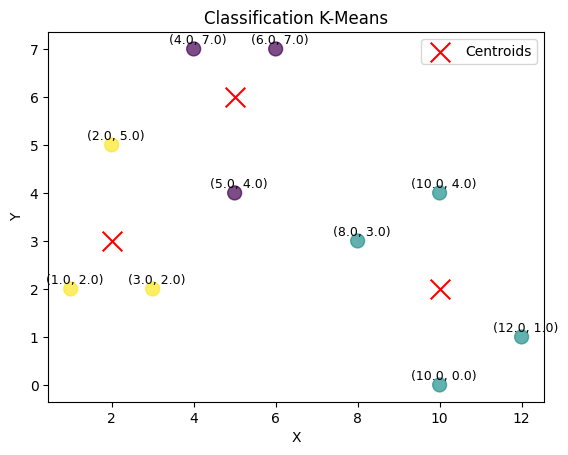

In [12]:
# Programme principal
points = saisie_points()
if len(points) > 0:
    k = saisie_nombre_clusters()
    labels, centroids = classification_kmeans(points, k)
    afficher_resultats(points, labels, centroids)
else:
    print("Aucun point saisi.")

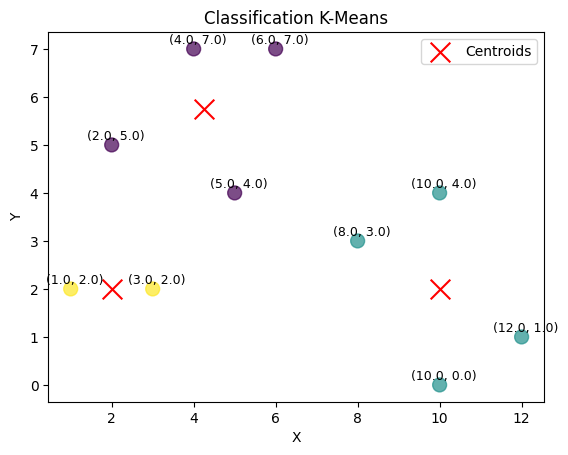

In [13]:
# affichage de la clutering sans utilisation de la bibliotheque sklearn

Labels, Centroids = classification_kmeans_fromScratch(points, k)
afficher_resultats(points, Labels, Centroids)

Nous remarquons qu'avec la classification sans utilisation de bibliotheque le point (2, 5) qui etait classer avec la classe des jaunes est maintenant avec la classe des violets